**About this file**:
This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

**The Dataset:** Bank Customer Churn Modeling


---


1.  we see that the dataset contains 14 columns (also known as
features or variables). The first 13 columns are the independent variable, while the last column is the dependent variable that contains a binary value of 1 or 0.
2.   Here, 1 refers to the case where the customer left the bank after 6 months
3.   0 is the case where the customer didn't leave the bank after 6 months. This is known as a binary classification problem, where you have only two possible values for the dependent variable—in this case, a customer either leaves the bank after 6 months or doesn't.


---




#**1.Importing the Libraries**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2.Importing the Dataset**

In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.shape

(10000, 14)

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

#**3.Data Analysis and Visualization**

In [10]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [11]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [12]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

**We will plot a Pie Chart**

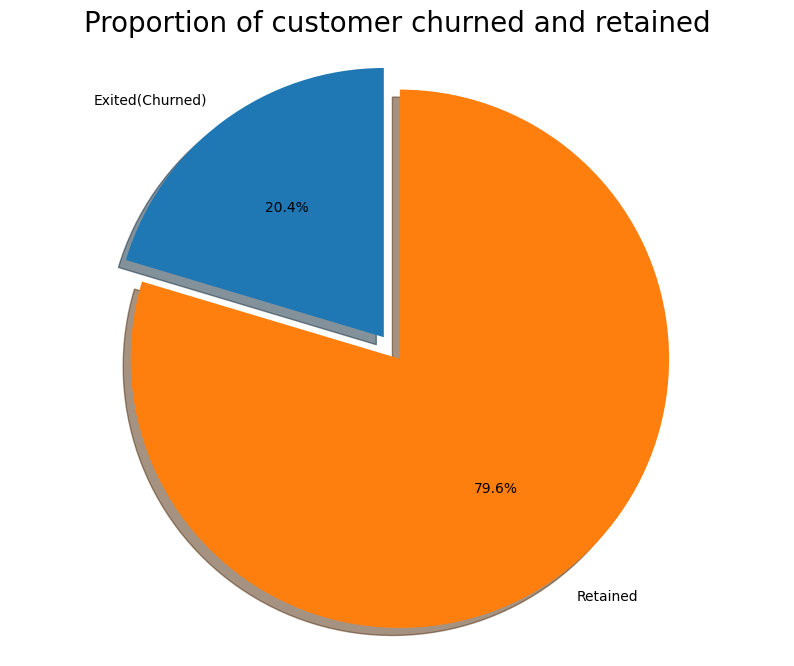

In [14]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

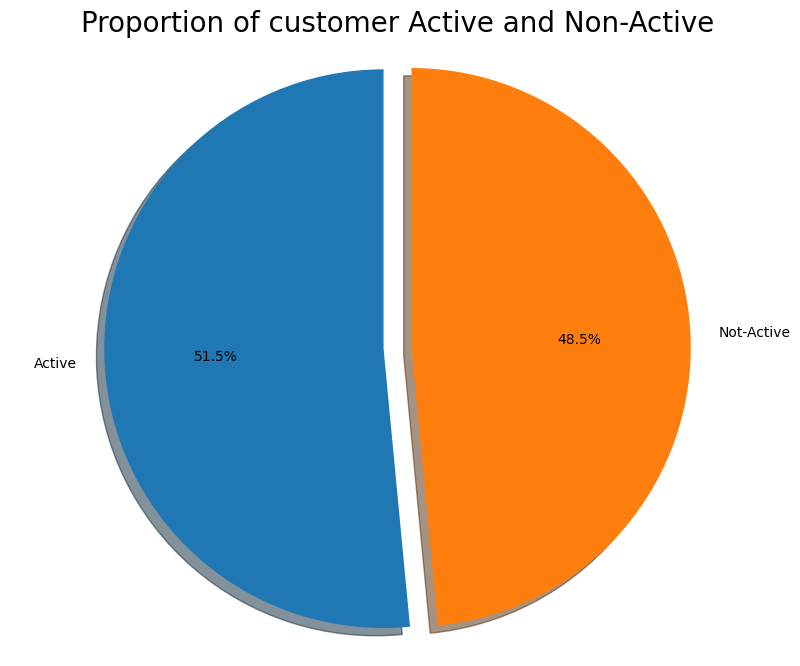

In [15]:
labels = 'Active', 'Not-Active'
sizes = [df.Exited[df['IsActiveMember']==1].count(), df.Exited[df['IsActiveMember']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Active and Non-Active", size = 20)
plt.show()

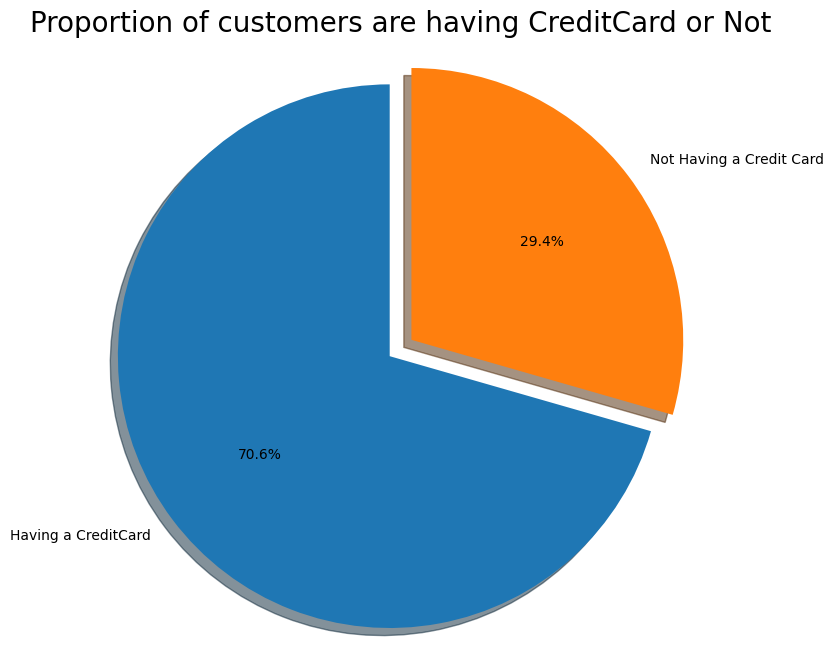

In [16]:
labels = 'Having a CreditCard', 'Not Having a Credit Card'
sizes = [df.Exited[df['HasCrCard']==1].count(), df.Exited[df['HasCrCard']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customers are having CreditCard or Not", size = 20)
plt.show()

In [17]:
import seaborn as sns

**This Bar plot is for Gender that how many male and female customers are present**

Male      5457
Female    4543
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

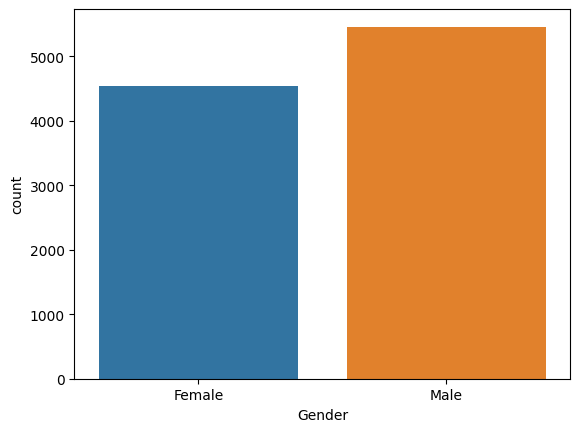

In [18]:
df.describe(include='all')
print(df['Gender'].value_counts())
sns.countplot(data=df,x='Gender',label='Counts')

**This histogram is for showing the credit score of bank customer**

#**The Credit score is a 3-digit score highlighting your credit history and rating. Anything between 750 and 900 is considered a good Credit score since lenders and financial institutions use this score to determine the associated risk and the creditworthiness of individuals seeking a loan or credit.**

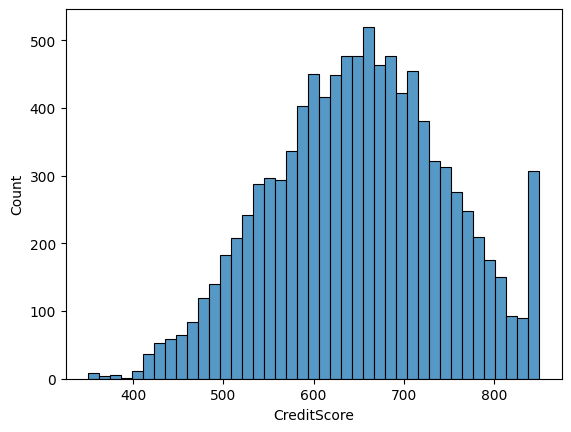

In [19]:
sns.histplot(data=df, x='CreditScore')
plt.show()

**This Histogram is for showing the bank balance of the customer**

#**Balance — A very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.**

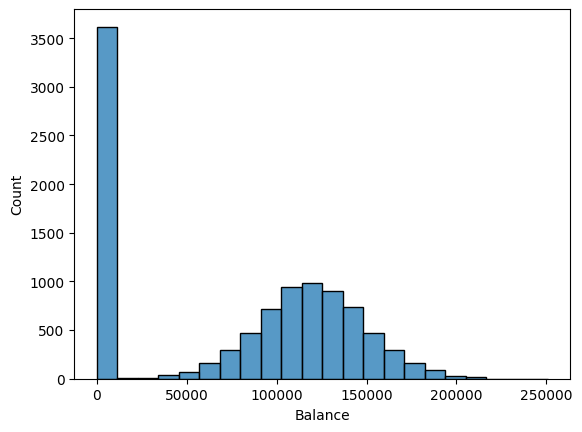

In [20]:
sns.histplot(data=df, x='Balance')
plt.show()

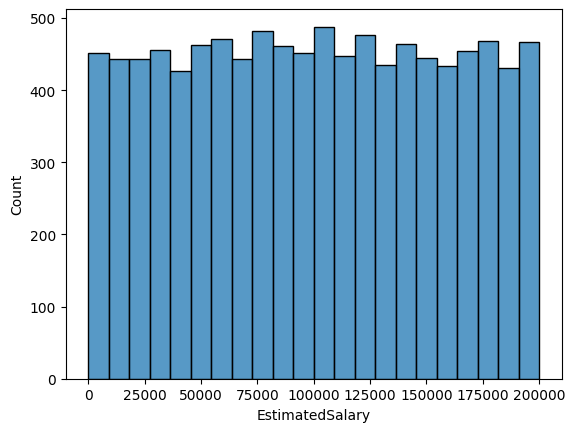

In [21]:
sns.histplot(data=df, x='EstimatedSalary')
plt.show()

**This Histogram is for showing the Age of the Customers**

<Axes: title={'center': 'Age of the customers'}, xlabel='Age', ylabel='count'>

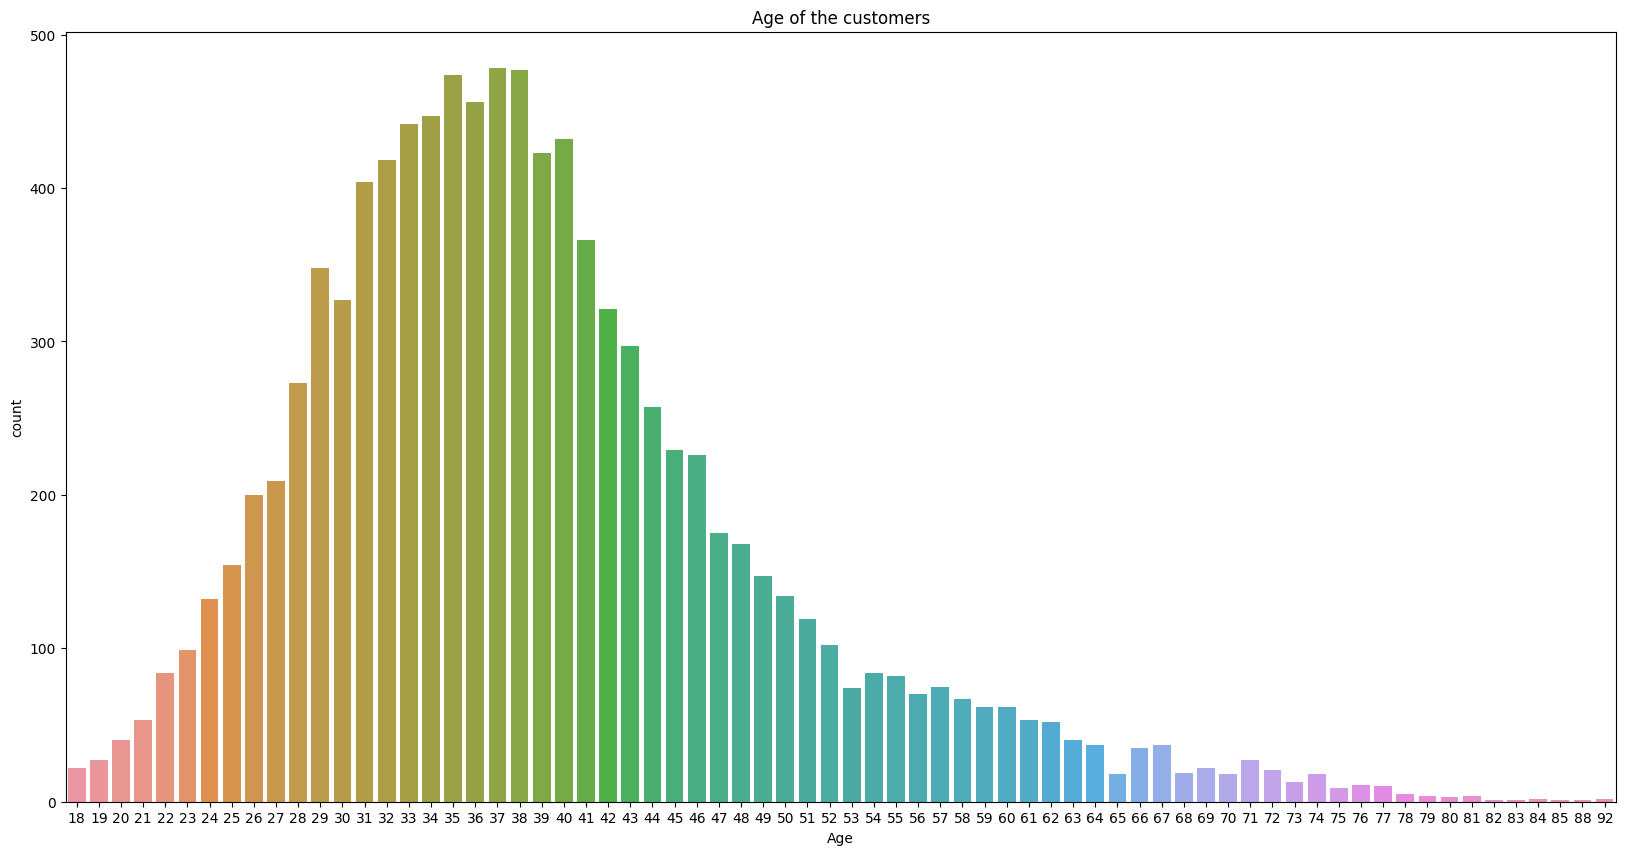

In [22]:
plt.figure(figsize=(20, 10))
plt.title("Age of the customers")
plt.xlabel("Age")
sns.countplot(x='Age',data=df)

**X-Axis='Age', Y-Axis='count'**

**As you can see the Customers Age 27-46 Years in majority**

<Axes: title={'center': 'Age of the customers'}, xlabel='Age', ylabel='count'>

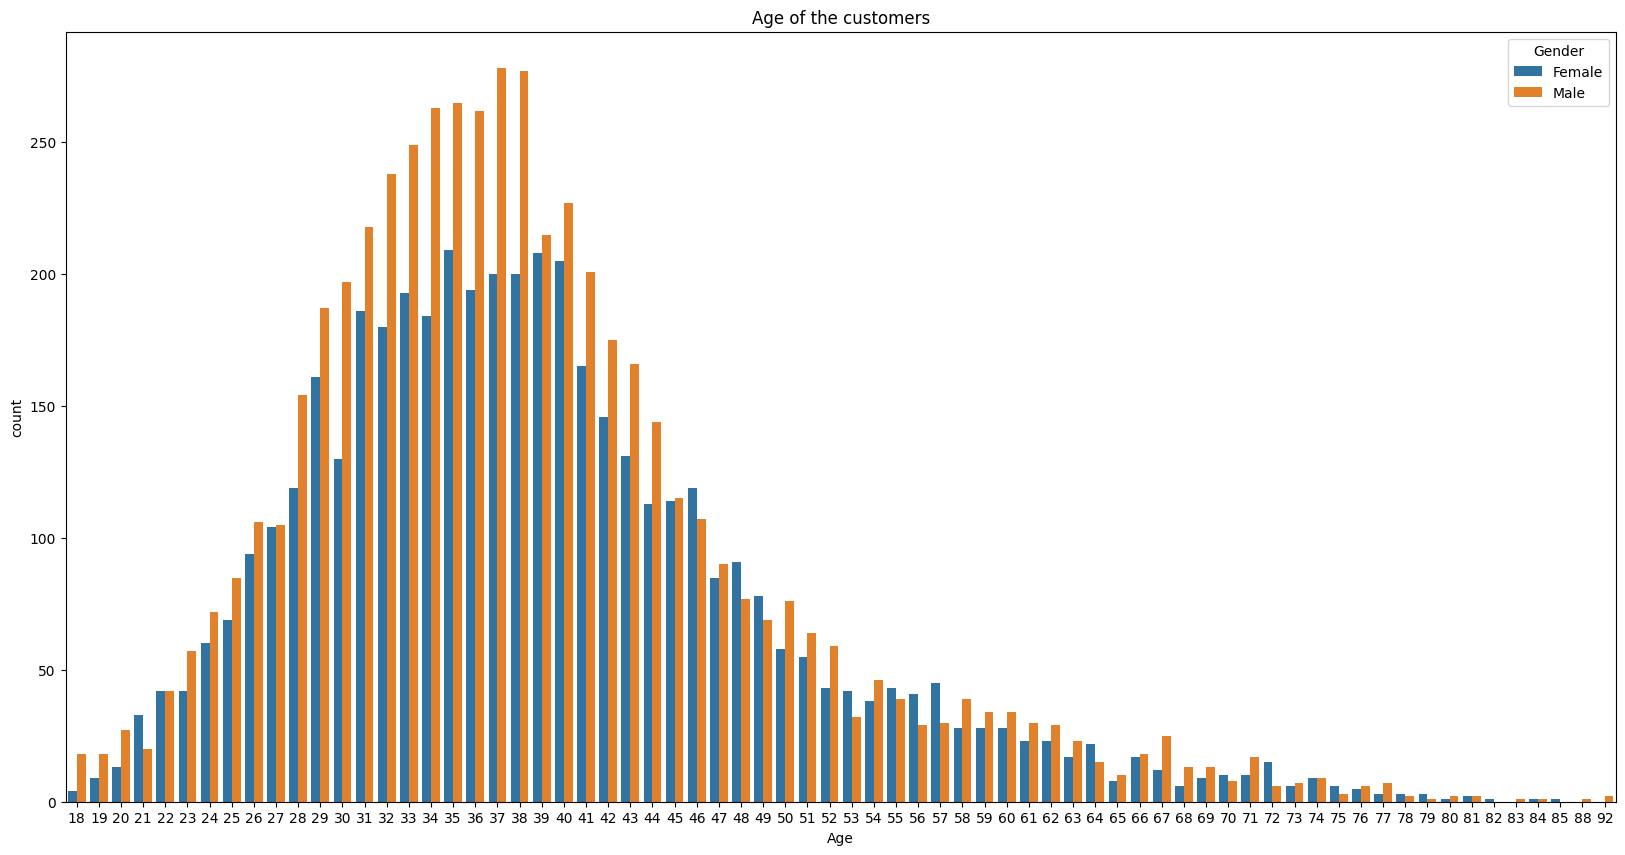

In [23]:
plt.figure(figsize=(20, 10))
plt.title("Age of the customers")
plt.xlabel("Age")
sns.countplot(x='Age',data=df,hue='Gender')

> #### **Data Visualization Basics:** _Subplots and multiple axes_
>
> One of the defining features of creating visualizations with `matplotlib`, is the great level of control offered to create multiple plots at once. As discussed earlier, generating a plot neccessitates the creation of 3 hierarchical objects:
>
> * The **figure** object, which could be considered as the canvas-holder, or an object containing all possible axes (plots).
>    * The **axes** object(s), which could be considered as the canvas(es), or the plot where we will be adding our visualizations.
>       * Everything that makes up the plot.
>
> Creating a figure with multiple subplots (axes) is easy, and can be referenced with the following:
>
> `figure, axes = plt.subplot(nrows = , ncols = , figsize = ...) `
>
> Where we generate a `figure` object and its `axes`. A `figure` can be divided into a grid of rows and columns, where each "cell" in our rows and columns is an axes and we can plot something inside of it.
>

<p align="center">
<img src="https://github.com/adelnehme/intro-to-data-visualization-Python-live-training/blob/master/images/subplots.gif?raw=true" width="55%">
</p>

> For example, `figure, axes = plt.subplots(1, 2)` creates a figure with 2 axes vertically on top of each other. The `axes` object is a numpy array where each element is a pointer to an `axes`.
>
> To create visualiations inside of an `axes`, most visualization functions have an `ax` arguments that lets us decide which visualization belongs on which axes.
>
> We can customize the contents of the plot in each `axes` by using `axes` methods that almost the same or similar to how we use helper functions with `plt`. To customize the first `axes` in the example plot above, we use the following:
>
> - `plt.xlabel()` --> `axes[0].set_xlabel()`
> - `plt.text()` --> `axes[0].text()`
>
_There's no need to memorize syntax here or the differences between both `plt` and `axes` methods, just know that the difference exists._

**This Histogram plot is for displaying for including male and female customers**

<Axes: xlabel='IsActiveMember', ylabel='count'>

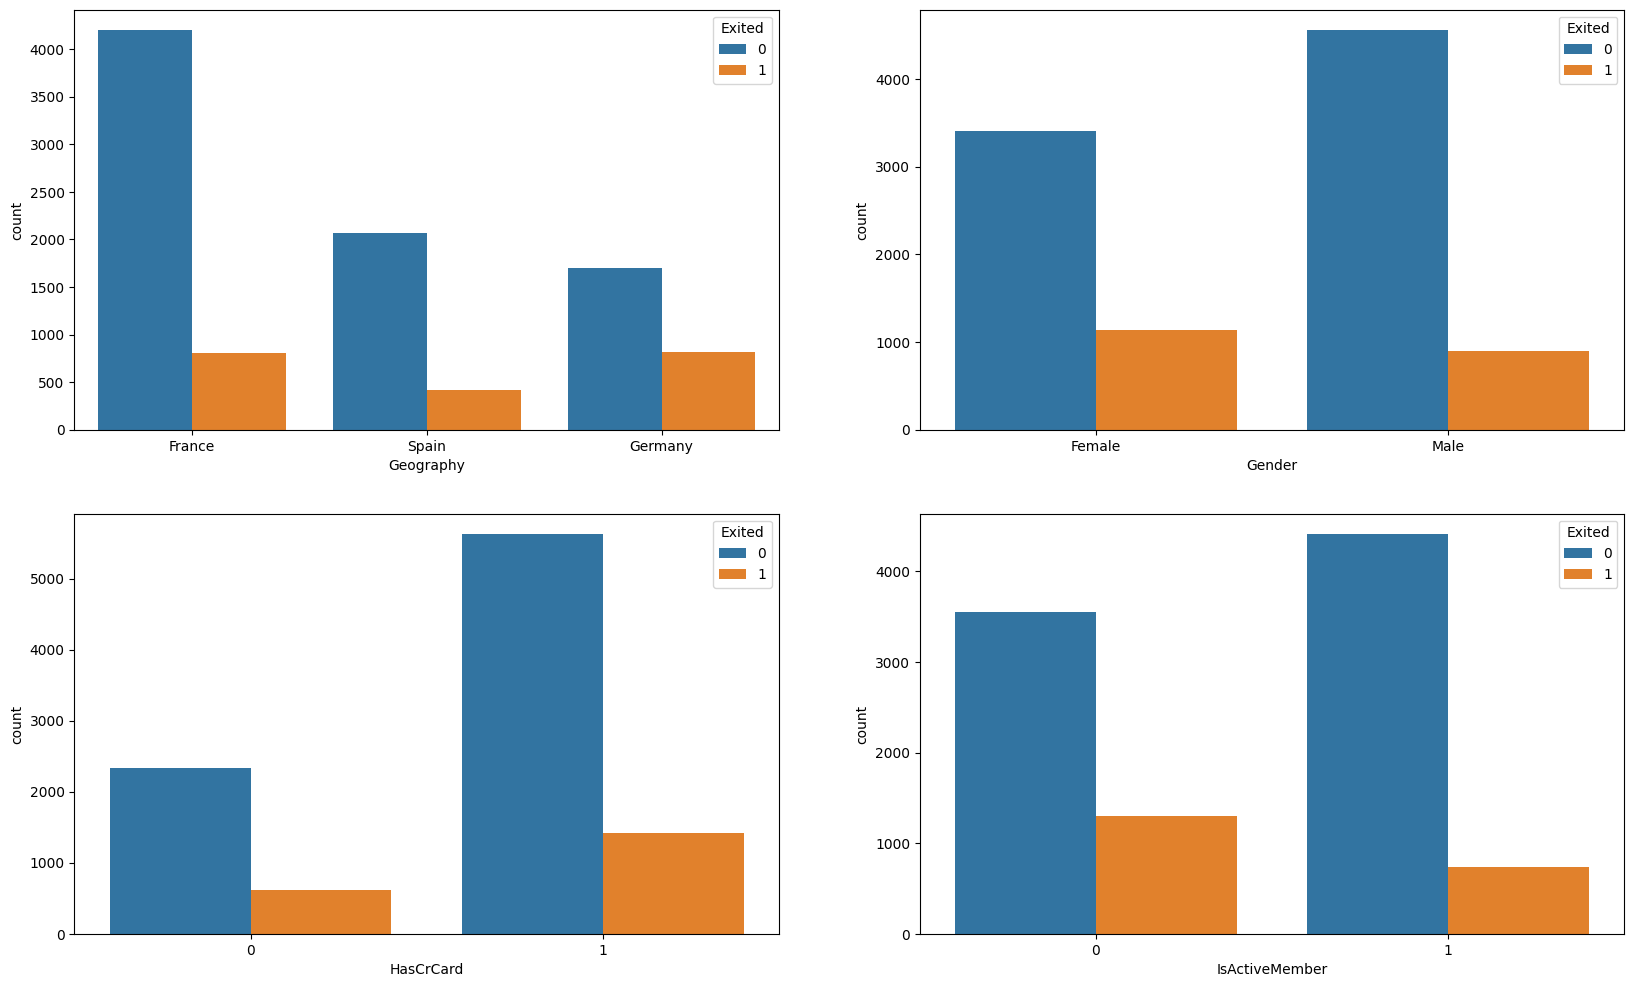

In [24]:
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

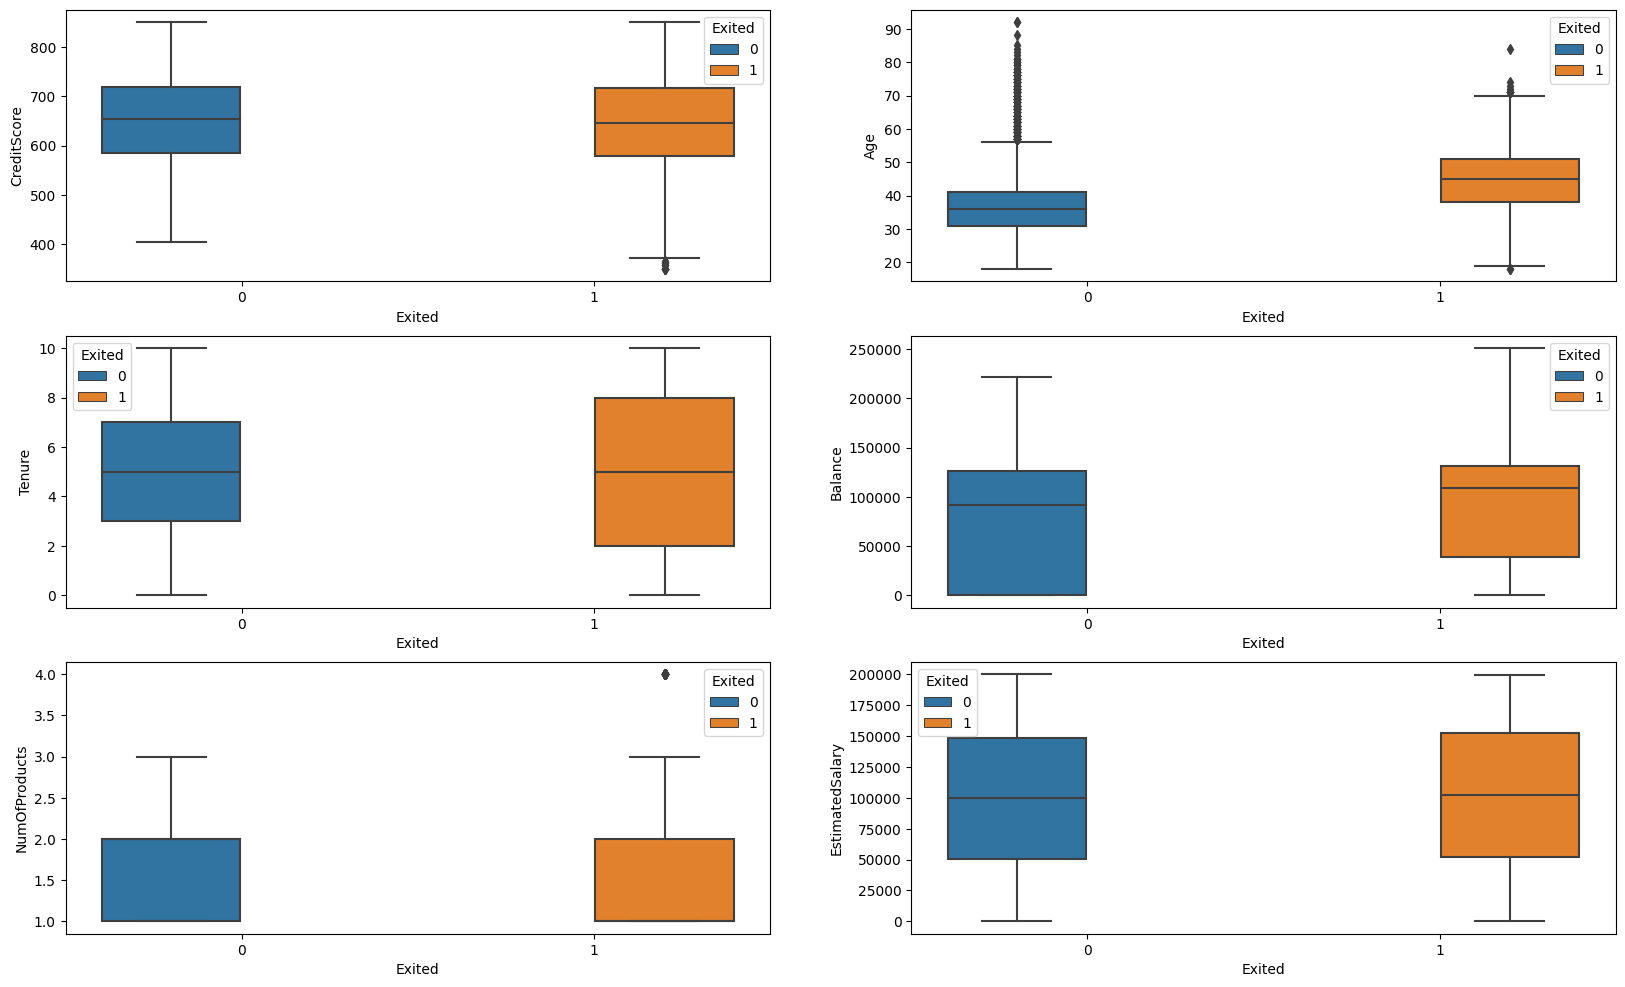

In [25]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

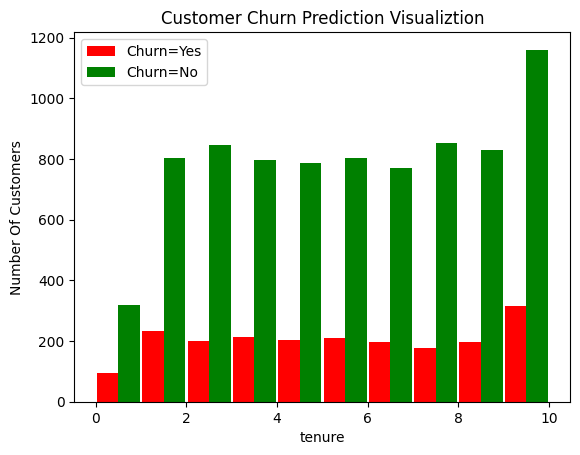

In [26]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [27]:
#Dataframe
tenure_df=pd.DataFrame(tenure_churn_yes['tenure'].value_counts().reset_index())
tenure_df.head()  #print

#Rename columns
tenure_df.rename(columns = {'index':'count'}, inplace = True)
tenure_df.columns  #print

#Plotting
data = tenure_df #dataset
churn_scatter1 = px.scatter(data, x="tenure",y='count')

churn_scatter1.update_traces(mode='markers', marker_line_width=2, marker_size=7,opacity=0.7)
churn_scatter1.update_layout(title='Tenure period')
churn_scatter1.update_xaxes(title='Days')
churn_scatter1.update_yaxes(title='Count')

churn_scatter1.show()

KeyError: ignored

**Showing Heatmap of the dataset**

<ipython-input-30-ce28a5bdc8d2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap='coolwarm')


<Axes: >

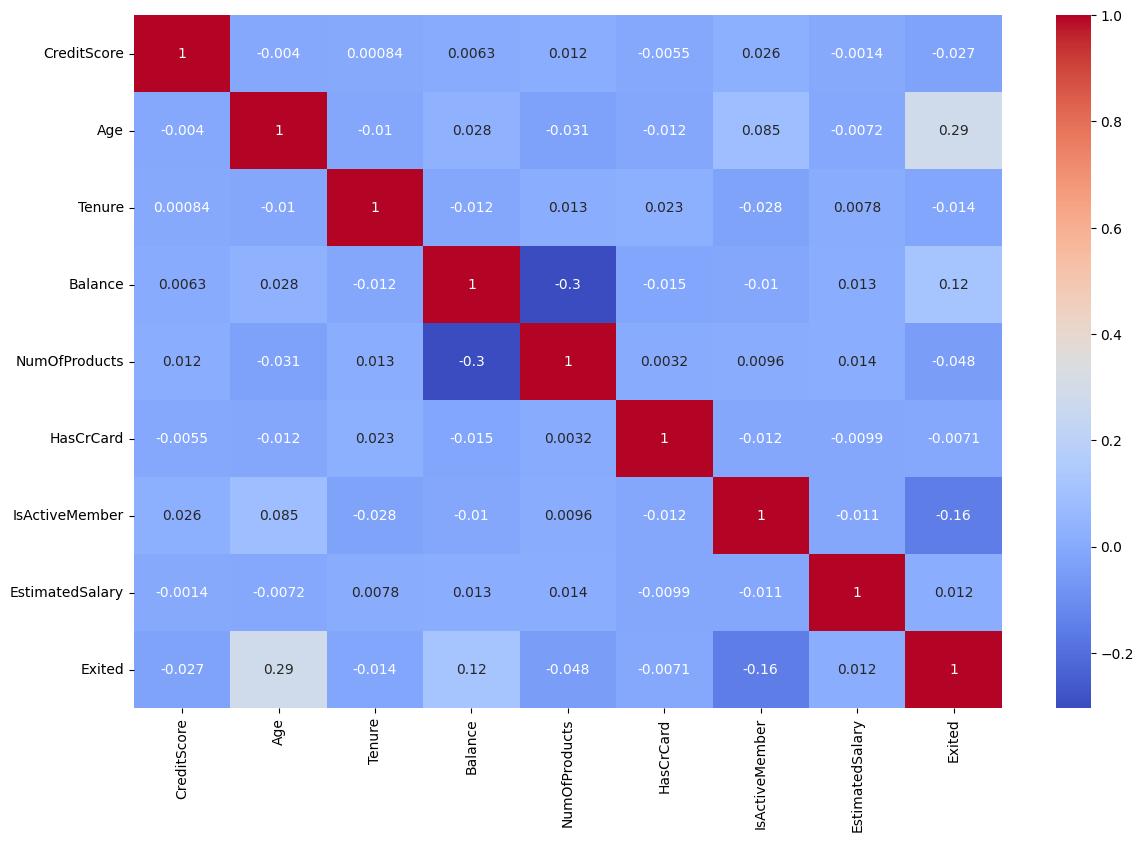

In [ ]:
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

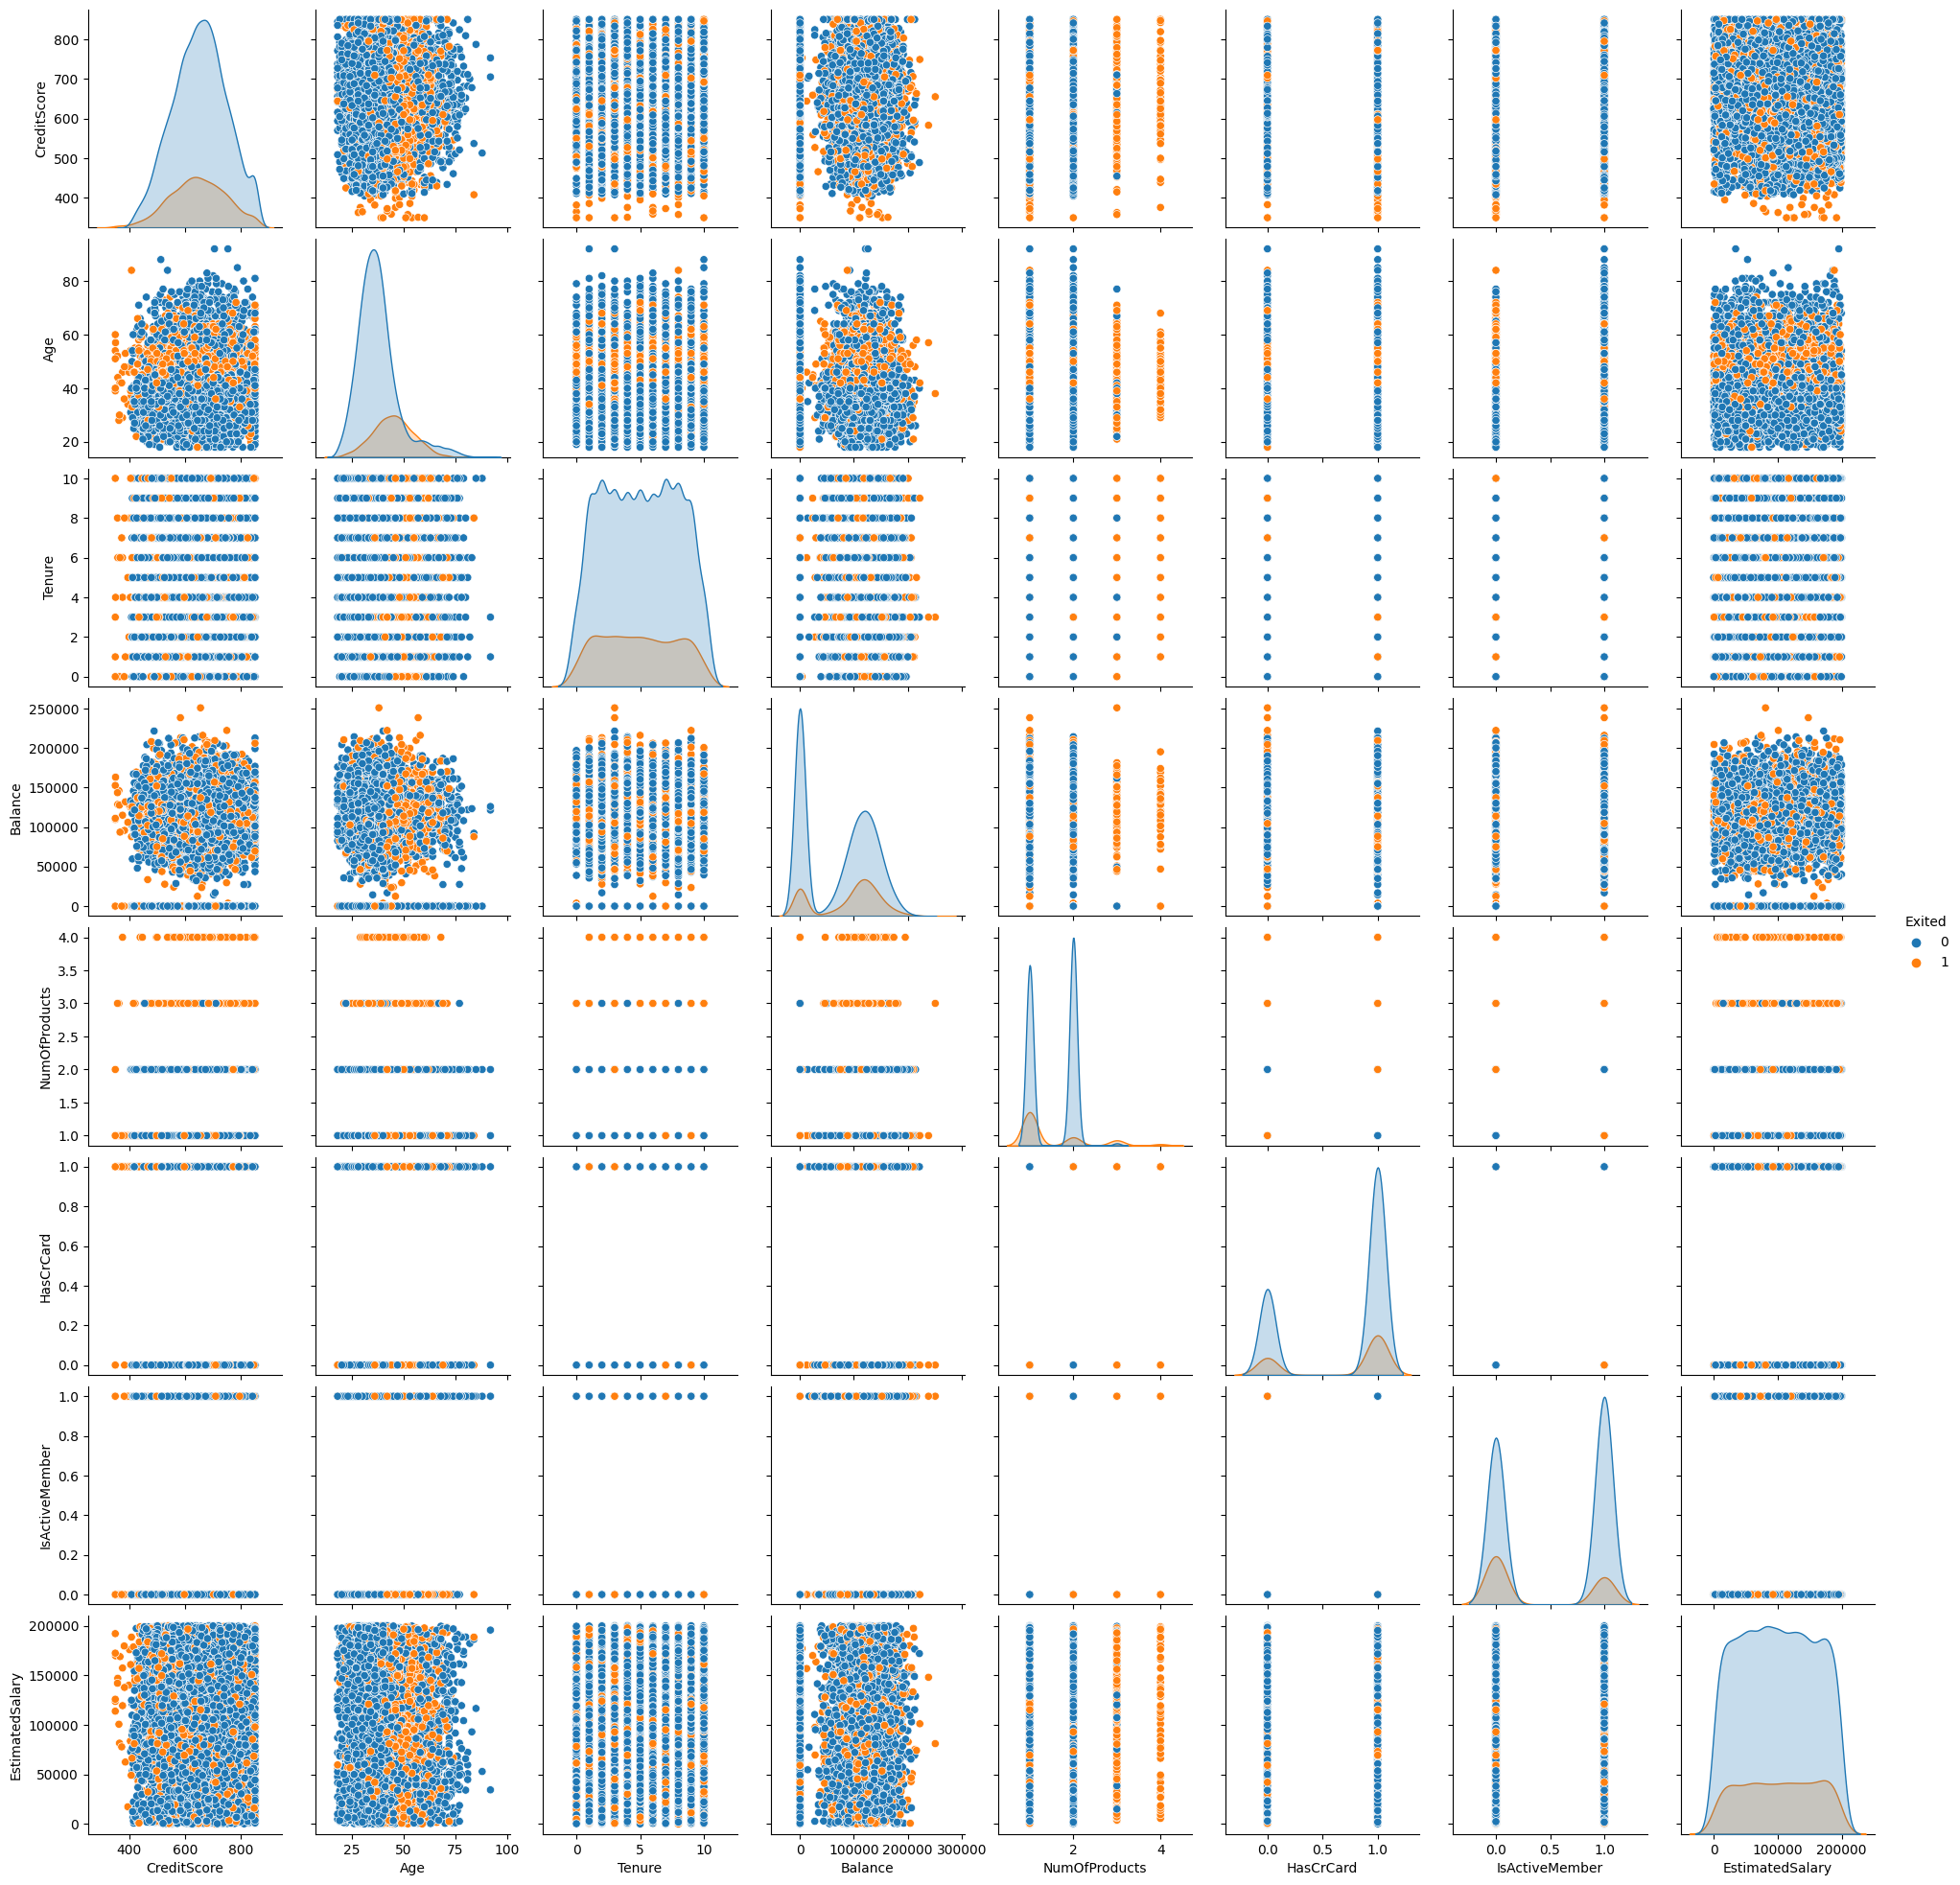

In [ ]:
sns.pairplot(data=df,hue='Exited')

#**4.Feature Engineering**

**Make a new column BankSalaryRatio**

(-1.0, 5.0)

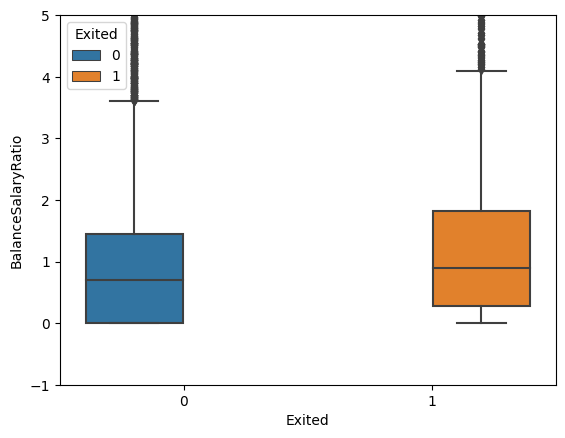

In [ ]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

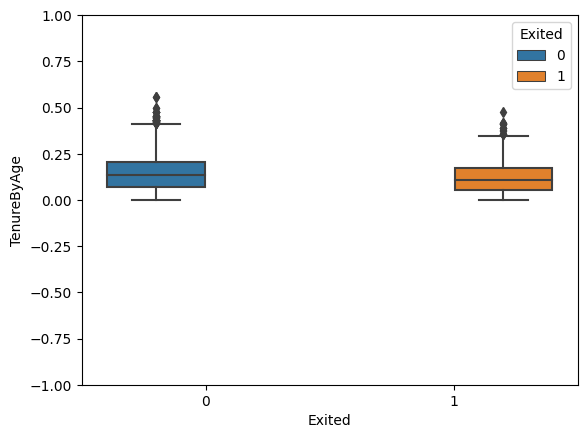

In [ ]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

**Printing a categorical variables**

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


#**5.Label Encoding**

**Change value in country column**

**Change value in gender column**

In [ ]:
#Change value in country column
df['Geography'] = df['Geography'].replace(['Germany'],'0')
df['Geography'] = df['Geography'].replace(['France'],'1')
df['Geography'] = df['Geography'].replace(['Spain'],'2')
#Change value in gender column
df['Gender'] = df['Gender'].replace(['Female'],'0')
df['Gender'] = df['Gender'].replace(['Male'],'1')

In [ ]:
df.head()

CreditScore Geography Gender  Age  Tenure    Balance  NumOfProducts  \
0          619         1      0   42       2       0.00              1   
1          608         2      0   41       1   83807.86              1   
2          502         1      0   42       8  159660.80              3   
3          699         1      0   39       1       0.00              2   
4          850         2      0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  \
0          1               1        101348.88       1            0.000000   
1          0               1        112542.58       0            0.744677   
2          1               0        113931.57       1            1.401375   
3          0               0         93826.63       0            0.000000   
4          1               1         79084.10       0            1.587055   

   TenureByAge  
0     0.047619  
1     0.024390  
2     0.190476  
3     0.025641  
4     0.046512

In [ ]:
df.tail()

CreditScore Geography Gender  Age  Tenure    Balance  NumOfProducts  \
9995          771         1      1   39       5       0.00              2   
9996          516         1      1   35      10   57369.61              1   
9997          709         1      0   36       7       0.00              1   
9998          772         0      1   42       3   75075.31              2   
9999          792         1      0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  \
9995          1               0         96270.64       0            0.000000   
9996          1               1        101699.77       0            0.564108   
9997          0               1         42085.58       1            0.000000   
9998          1               0         92888.52       1            0.808230   
9999          1               0         38190.78       0            3.407702   

      TenureByAge  
9995     0.128205  
9996     0.285714  
9997     0.194444  
9998     0.071429  
9999     0.142857

**Convert object column data into integer**

In [ ]:
df['Geography'] = pd.to_numeric(df['Geography'])
df['Gender'] = pd.to_numeric(df['Gender'])

In [ ]:
df.dtypes

CreditScore             int64
Geography               int64
Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
BalanceSalaryRatio    float64
TenureByAge           float64
dtype: object

**Showing the correlation Heatmap of this dataset**

<Axes: >

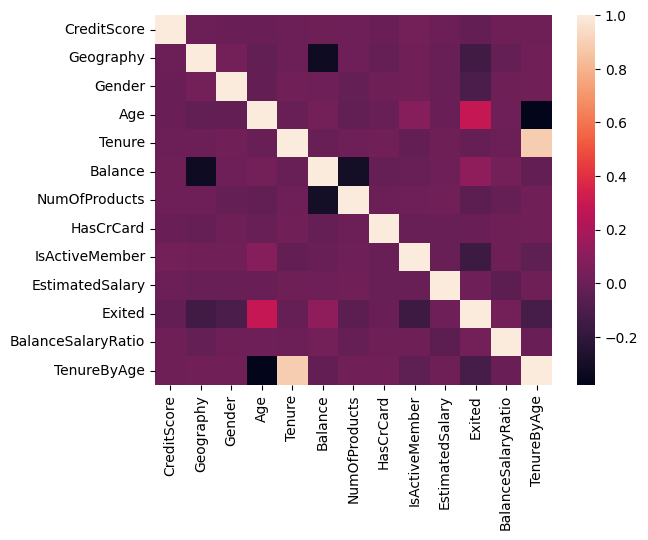

In [ ]:
sns.heatmap(df.corr(), fmt='.2g')

#**6.Building a Machine Learning Model**

**Dropping an Exited Column**

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

**Splitting the Dataset into Training and Testing**

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)



1.   **Decision Tree**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 78.05 %


2.**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.25 %


3.**Support Vector Machine**

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


4.**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 84.95 %


**Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy**

In [ ]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix

**Random Forest**

In [ ]:
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.77      0.47      0.58       411

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



**Plotting a Confusion Matrix**

Text(0.5, 1.0, 'Accuracy Score: 0.8625')

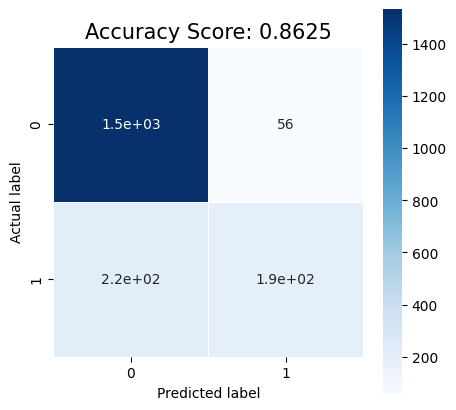

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

**Plotting a ROC Curve for Random Forest**

#The full form of **ROC** is **Receiver Operating Characteristic**.The ROC curve is a graphical representation of the effectiveness of a binary classification model at different thresholds. It plots the true positive rate (TPR) against the false positive rate (FPR) at different classification thresholds.

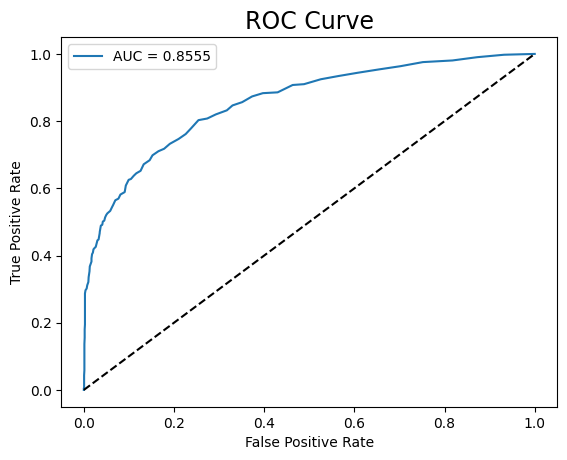

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 17)
plt.legend()

**XGBoost**

In [ ]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1589
           1       0.69      0.48      0.57       411

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8495')

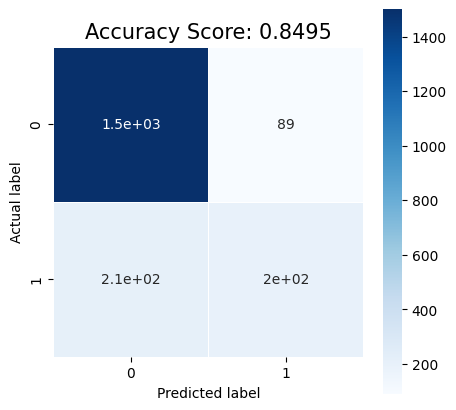

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

**Plotting a ROC Curve for XGBoost**

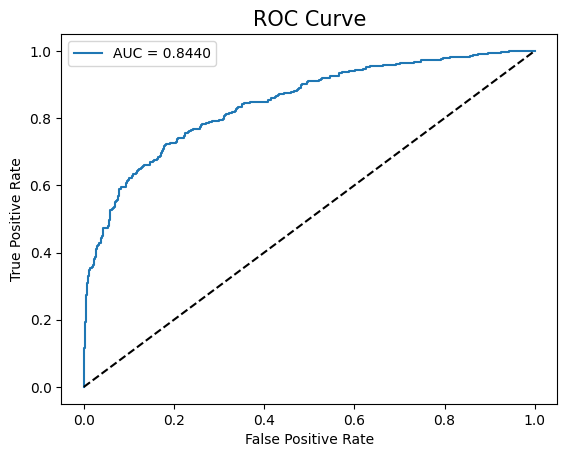

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

#**7.Checking the Final Accuracy**

**Plotting a Confusion Matrix for Truth and Predicted**

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1589
           1       0.69      0.48      0.57       411

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [ ]:
import tensorflow as tf

Text(95.72222222222221, 0.5, 'Truth')

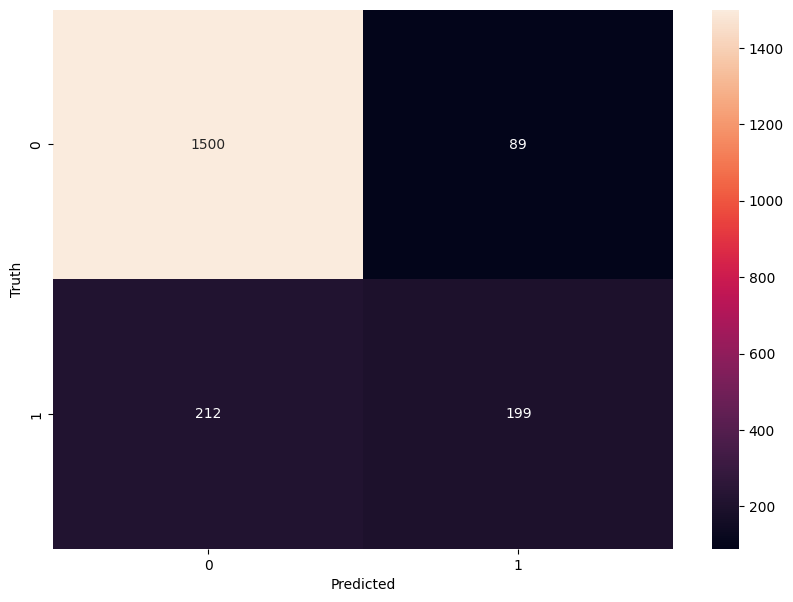

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  84.95 %


#**H2O Auto ML**

1_S6kE_nwoge5m7ok1onsjsQ.png

### H2O is a fully open-source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms, including gradient boosted machines, generalized linear models, deep learning, and many more.

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=645d0786b3b736e974a377571c2bf79c3ef9c68f49073b876be25d28984e2b0f
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy_761g0s
  JVM stdout: /tmp/tmpy_761g0s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy_761g0s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    3 days
H2O_cluster_name:           H2O_from_python_unknownUser_rw2o4k
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    16 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
df = h2o.import_file("/content/Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

RowNumber    CustomerId  Surname      CreditScore  Geography    Gender      Age    Tenure    Balance    NumOfProducts    HasCrCard    IsActiveMember    EstimatedSalary    Exited
-----------  ------------  ---------  -------------  -----------  --------  -----  --------  ---------  ---------------  -----------  ----------------  -----------------  --------
          1   1.56346e+07  Hargrave             619  France       Female       42         2        0                  1            1                 1           101349           1
          2   1.56473e+07  Hill                 608  Spain        Female       41         1    83807.9                1            0                 1           112543           0
          3   1.56193e+07  Onio                 502  France       Female       42         8   159661                  3            1                 0           113932           1
          4   1.57014e+07  Boni                 699  France       Female       39         1        0                  2            0                 0            93826.6         0
          5   1.57379e+07  Mitchell             850  Spain        Female       43         2   125511                  1            1                 1            79084.1         0
          6   1.5574e+07   Chu                  645  Spain        Male         44         8   113756                  2            1                 0           149757           1
          7   1.55925e+07  Bartlett             822  France       Male         50         7        0                  2            1                 1            10062.8         0
          8   1.56561e+07  Obinna               376  Germany      Female       29         4   115047                  4            1                 0           119347           1
          9   1.57924e+07  He                   501  France       Male         44         4   142051                  2            0                 1            74940.5         0
         10   1.55924e+07  H?                   684  France       Male         27         2   134604                  1            1                 1            71725.7         0
[10 rows x 14 columns]

In [ ]:
df_train,df_test= df.split_frame(ratios=[.8])

In [ ]:
df_train

RowNumber    CustomerId  Surname      CreditScore  Geography    Gender      Age    Tenure    Balance    NumOfProducts    HasCrCard    IsActiveMember    EstimatedSalary    Exited
-----------  ------------  ---------  -------------  -----------  --------  -----  --------  ---------  ---------------  -----------  ----------------  -----------------  --------
          1   1.56346e+07  Hargrave             619  France       Female       42         2        0                  1            1                 1           101349           1
          2   1.56473e+07  Hill                 608  Spain        Female       41         1    83807.9                1            0                 1           112543           0
          4   1.57014e+07  Boni                 699  France       Female       39         1        0                  2            0                 0            93826.6         0
          5   1.57379e+07  Mitchell             850  Spain        Female       43         2   125511                  1            1                 1            79084.1         0
          6   1.5574e+07   Chu                  645  Spain        Male         44         8   113756                  2            1                 0           149757           1
          7   1.55925e+07  Bartlett             822  France       Male         50         7        0                  2            1                 1            10062.8         0
          9   1.57924e+07  He                   501  France       Male         44         4   142051                  2            0                 1            74940.5         0
         10   1.55924e+07  H?                   684  France       Male         27         2   134604                  1            1                 1            71725.7         0
         12   1.57372e+07  Andrews              497  Spain        Male         24         3        0                  2            1                 0            76390           0
         14   1.56915e+07  Chin                 549  France       Female       25         5        0                  2            0                 0           190858           0
[8004 rows x 14 columns]

In [ ]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

In [ ]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

In [ ]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
06:18:55.214: Project: AutoML_1_20231224_61855
06:18:55.215: Setting stopping tolerance adaptively based on the training frame: 0.011177545850247397
06:18:55.216: Build control seed: 10
06:18:55.216: training frame: Frame key: AutoML_1_20231224_61855_training_py_3_sid_81c5    cols: 14    rows: 8004  chunks: 8    size: 425866  checksum: 4307085022899306465
06:18:55.217: validation frame: NULL
06:18:55.217: leaderboard frame: NULL
06:18:55.217: blending frame: NULL
06:18:55.217: response column: Exited
06:18:55.217: fold column: null
06:18:55.218: weights column: null
06:18:55.240: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231224_61855


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    2
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07252338686371727
RMSE: 0.26930166517071014
MAE: 0.17647020913744563
RMSLE: 0.18670786663484756
Mean Residual Deviance: 0.07252338686371727
R^2: 0.5548378630931448
Null degrees of freedom: 8003
Residual degrees of freedom: 7995
Null deviance: 1303.9680159920035
Residual deviance: 580.477188457193
AIC: 1733.1031211108643

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10595101519971667
RMSE: 0.3255011754198695
MAE: 0.21588756374579457
RMSLE: 0.22887062148590606
Mean Residual Deviance: 0.10595101519971667
R^2: 0.34965281720243346
Null degrees of freedom: 8003
Residual degrees of freedom: 7995
Null deviance: 1304.19955327784
Residual deviance: 848.0319256585323
AIC: 4767.161626385332

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid
----------------------  --------  ----------  ------------  ------------
mae                     0.216262  0.00092085  0.215611      0.216913
mean_residual_deviance  0.105893  0.00353974  0.10339       0.108396
mse                     0.105893  0.00353974  0.10339       0.108396
null_deviance           652.1     0.230264    651.937       652.263
r2                      0.349802  0.0320681   0.372478      0.327127
residual_deviance       423.897   21.0547     409.009       438.785
rmse                    0.325389  0.00543925  0.321543      0.329235
rmsle                   0.228684  0.00325166  0.226384      0.230983

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

## Seeing the Leaderboard

In [ ]:
lb = aml.leaderboard

In [ ]:
lb

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_AllModels_1_AutoML_1_20231224_61855     0.325501  0.105951  0.215888  0.228871                  0.105951
StackedEnsemble_BestOfFamily_1_AutoML_1_20231224_61855  0.325625  0.106032  0.216768  0.229193                  0.106032
GBM_1_AutoML_1_20231224_61855                           0.326553  0.106637  0.218693  0.229679                  0.106637
GBM_2_AutoML_1_20231224_61855                           0.327893  0.107514  0.214649  0.230287                  0.107514
GBM_3_AutoML_1_20231224_61855                           0.329358  0.108477  0.214421  0.231565                  0.108477
GBM_4_AutoML_1_20231224_61855                           0.330886  0.109485  0.220192  0.232852                  0.109485
DRF_1_AutoML_1_20231224_61855                           0.333998  0.111554  0.218945  0.236361                  0.111554
XGBoost_3_AutoML_1_20231224_61855                       0.334709  0.11203   0.222236  0.237234                  0.11203
XRT_1_AutoML_1_20231224_61855                           0.342343  0.117199  0.251327  0.243911                  0.117199
XGBoost_2_AutoML_1_20231224_61855                       0.357557  0.127847  0.242112  0.257916                  0.127847
[12 rows x 6 columns]

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20231224_61855',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231224_61855',
 'GBM_1_AutoML_1_20231224_61855',
 'GBM_2_AutoML_1_20231224_61855',
 'GBM_3_AutoML_1_20231224_61855',
 'GBM_4_AutoML_1_20231224_61855',
 'DRF_1_AutoML_1_20231224_61855',
 'XGBoost_3_AutoML_1_20231224_61855',
 'XRT_1_AutoML_1_20231224_61855',
 'XGBoost_2_AutoML_1_20231224_61855',
 'XGBoost_1_AutoML_1_20231224_61855',
 'GLM_1_AutoML_1_20231224_61855']

In [ ]:
aml.leader.model_performance(df_test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.09834545393054243
RMSE: 0.31360078751581993
MAE: 0.20522438207551513
RMSLE: 0.21971070722943312
Mean Residual Deviance: 0.09834545393054243
R^2: 0.38278511288298267
Null degrees of freedom: 1995
Residual degrees of freedom: 1987
Null deviance: 318.10942529734734
Residual deviance: 196.2975260453627
AIC: 1055.1417831959288

**Mean Squared Error (MSE).**

**Root Mean Squared Error (RMSE).**

**Mean Absolute Error (MAE).**

**Root Mean Squared Logarthamic(Log) Error (RMSLE).**

**R^2 Error(R^2)**

**Akaike Information Criterion (AIC)** : Akaike information criterion ( AIC) is a single number score that can be used to determine which of multiple models is most likely to be the best model for a given data set. It estimates models relatively, meaning that AIC scores are only useful in comparison with other AIC scores for the same data set. A lower AIC score is better.

**Null degrees of freedom.**

**Residual degrees of freedom**.

**Null deviance**.

**Residual deviance**.

In [ ]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231224_61855


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    2
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07252338686371727
RMSE: 0.26930166517071014
MAE: 0.17647020913744563
RMSLE: 0.18670786663484756
Mean Residual Deviance: 0.07252338686371727
R^2: 0.5548378630931448
Null degrees of freedom: 8003
Residual degrees of freedom: 7995
Null deviance: 1303.9680159920035
Residual deviance: 580.477188457193
AIC: 1733.1031211108643

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10595101519971667
RMSE: 0.3255011754198695
MAE: 0.21588756374579457
RMSLE: 0.22887062148590606
Mean Residual Deviance: 0.10595101519971667
R^2: 0.34965281720243346
Null degrees of freedom: 8003
Residual degrees of freedom: 7995
Null deviance: 1304.19955327784
Residual deviance: 848.0319256585323
AIC: 4767.161626385332

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid
----------------------  --------  ----------  ------------  ------------
mae                     0.216262  0.00092085  0.215611      0.216913
mean_residual_deviance  0.105893  0.00353974  0.10339       0.108396
mse                     0.105893  0.00353974  0.10339       0.108396
null_deviance           652.1     0.230264    651.937       652.263
r2                      0.349802  0.0320681   0.372478      0.327127
residual_deviance       423.897   21.0547     409.009       438.785
rmse                    0.325389  0.00543925  0.321543      0.329235
rmsle                   0.228684  0.00325166  0.226384      0.230983

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'StackedEnsemble_AllModels_1_AutoML_1_20231224_61855',
   'type': 'Key<Model>',
   'URL': '/3/Models/StackedEnsemble_AllModels_1_AutoML_1_20231224_61855'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231224_61855_training_py_3_sid_81c5',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231224_61855_training_py_3_sid_81c5'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231224_61855_training_py_3_sid_81c5',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231224_61855_training_py_3_sid_81c5'}},
 'response_column': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_na

In [ ]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20231224_61855


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  8/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  3/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    2
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07252338686371727
RMSE: 0.26930166517071014
MAE: 0.17647020913744563
RMSLE: 0.18670786663484756
Mean Residual Deviance: 0.07252338686371727
R^2: 0.5548378630931448
Null degrees of freedom: 8003
Residual degrees of freedom: 7995
Null deviance: 1303.9680159920035
Residual deviance: 580.477188457193
AIC: 1733.1031211108643

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10595101519971667
RMSE: 0.3255011754198695
MAE: 0.21588756374579457
RMSLE: 0.22887062148590606
Mean Residual Deviance: 0.10595101519971667
R^2: 0.34965281720243346
Null degrees of freedom: 8003
Residual degrees of freedom: 7995
Null deviance: 1304.19955327784
Residual deviance: 848.0319256585323
AIC: 4767.161626385332

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid
----------------------  --------  ----------  ------------  ------------
mae                     0.216262  0.00092085  0.215611      0.216913
mean_residual_deviance  0.105893  0.00353974  0.10339       0.108396
mse                     0.105893  0.00353974  0.10339       0.108396
null_deviance           652.1     0.230264    651.937       652.263
r2                      0.349802  0.0320681   0.372478      0.327127
residual_deviance       423.897   21.0547     409.009       438.785
rmse                    0.325389  0.00543925  0.321543      0.329235
rmsle                   0.228684  0.00325166  0.226384      0.230983

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
y_pred

predict
---------
1.01639
0.969017
0.0319996
0.0351263
0.176524
0.0228651
0.0744795
0.153063
0.0440407
0.738512
[1996 rows x 1 column]